<a href="https://colab.research.google.com/github/FrancescoRosi01/Tesi/blob/main/play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# in questa cella alcune funzioni che servono dopo

import cv2
import numpy as np
import matplotlib.pyplot as plt

black = (0,0,0)
white = (255,250,255)
blue = (173,216,230)
orange = (255,165,0)

def gen_image(H,W,angle,offset,background_color,line_color,line_width=30):
    dims = (H,W,3)
    img = np.full(dims, background_color, dtype=np.uint8)
    rad = angle * np.pi / 180 # convertiamo in radianti
    alfa = np.tan(rad) # otteniamo il coeff. angolare della linea
    y2 = int(alfa * (H // 2)) # e l'offset da sommare o sottrarre a center_cols
    center_rows = H // 2
    center_cols = W // 2
    cv2.line(img,(center_cols - y2 + offset,0),(center_cols + y2 + offset,H),line_color,line_width,lineType=cv2.LINE_AA)
    return img
def apply_effects(img):
    # applichiamo il filtro gaussiano
    img = img.astype(np.float32)
    img = cv2.GaussianBlur(img,(5,5),0)
    # aggiungiamo rumore gaussiano
    img = img + np.random.normal(0, 13, img.shape)
    img = img.clip(0,255).astype(np.uint8)
    return img
def preprocess_for_model(img):
    """abbiamo bisogno di questa funzione perchè opencv restituisce dei tensori
      BGR, di tipo uint8. Il modello prende in input delle immagini RGB di tipo
      float32"""
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (224,224))
    img_normalized = img_resized.astype(np.float32) / 255.0
    # dobbiamo aggiungere una dimensione (quella di batch) al tensore 3d
    img_batch = np.expand_dims(img_normalized, axis=0)
    return img_batch

In [2]:
# cloniamo la repo dove c'è il modello già addestrato
!git clone https://github.com/FrancescoRosi01/Tesi.git

Cloning into 'Tesi'...
remote: Enumerating objects: 669, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 669 (delta 1), reused 6 (delta 1), pack-reused 663 (from 2)
Receiving objects: 100% (669/669), 119.55 MiB | 33.59 MiB/s, done.
Resolving deltas: 100% (1/1), done.


modificare i **parametri** per capire la funzione gen_image()

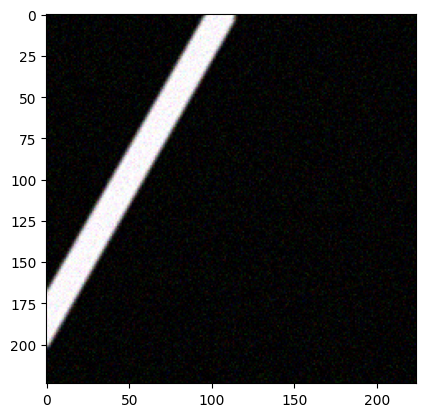

In [24]:
angle = -30
offset = -70
H = 224
W = 224
line_width = 15
img = apply_effects(gen_image(H,W,angle,offset,black,white,line_width))
plt.imshow(img)

In [28]:
# eseguire la cella per vedere la predizione del modello sull'immagine appena
# generata

# importiamo il modello già addestrato
import tensorflow as tf
from tensorflow import keras

model = keras.models.load_model('Tesi/model.keras')
input = preprocess_for_model(img)
print(f"angolo (predizione) : {model(input).numpy().item() * 45}")
print(f"angolo (vero) : {angle}")

angolo (predizione) : -28.608347475528717
angolo (vero) : -30
